```bash
                 _             
                | |            
 ____  _   _  __| |___   __ ___
|  _ \| | | |/ _  |  _ \(____ |
| |_| | |_| ( (_| | | | / ___ |
|  __/ \__  |\____|_| |_\_____|
|_|   (____/ 

```  

[Pydna](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-015-0544-x) 파이썬 패키지는 분자 생물학의 클로닝을 도와줍니다. 제공하는 기능은 다음과 같습니다. 

- Restriction digestion
- Ligation
- PCR
- Primer design
- Gibson assembly
- Golden gate assembly
- Homologous recombination
- Gel electrophoresis of DNA with generation of gel images

# PCR simulation
하나 예를 들어보겠습니다. 두 가지 PCR을 진행해보려고 합니다 각각 C3, C5라고 이름을 붙였구요. C3는 정상적인 PCR 반응이 가능하고, C5는 Primer에 문제가 있어 PCR이 되지 않습니다.

In [23]:
# 필요한 pydna 라이브러리를 불러옵니다.
import pydna.parsers as parsers
from pydna.amplify import pcr

## 서열 불러오기

> 사용된 서열은 ape 파일로 저장되어 있습니다.

In [ ]:
# template template loading
C3 = pydna.parsers.parse("CEACAM3.ape", ds=True)
C3_F = pydna.parsers.parse_primers("C3_F.ape")
C3_R = pydna.parsers.parse_primers("C3_R.ape")

## PCR 진행하기

In [24]:
# PCR
C3_pcr_prod = pcr(C3_F, C3_R, C3)

## Agarose gel electrophoresis 결과 예측

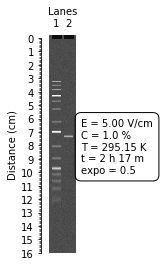

In [25]:
%matplotlib inline
from pydna.gel import weight_standard_sample, Gel

st = weight_standard_sample("1kb+_GeneRuler")
Gel([st, [C3_pcr_prod]], gel_len=16).run()

# PCR 조건 예측

일반적인 taq polymerase PCR과 pFu를 사용한 PCR의 조건을 예측해보겠습니다.

## 일반 PCR

In [26]:
# general PCR
print(C3_pcr_prod.program())


Taq (rate 30 nt/s) 35 cycles             |1325bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 58.6°C/ 0min40s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 54%
|         |         30s           |      |4-12°C


## Pfu PCR

In [27]:
# Pfu PCR
print(C3_pcr_prod.dbd_program())


Pfu-Sso7d (rate 15s/kb)                 |1325bp
Three-step|          30 cycles   |      |Tm formula: Pydna tmbresluc
98.0°C    |98.0°C                |      |SaltC 50mM
__________|_____          72.0°C |72.0°C|Primer1C 1.0µM
00min30s  |10s  \ 58.0°C ________|______|Primer2C 1.0µM
          |      \______/ 0min19s|10min |GC 54%
          |        10s           |      |4-12°C



# Primer anealing 예측
Primer가 template DNA에 어떻게 붙는지를 예상해보겠습니다.

In [28]:
# anealing results
print(C3_pcr_prod.figure())

         5ATGGGGCCCCCCTTGGC...AAAGGAGATGTGGCTTCT3
                              |||||||||||||||||| tm 53.9 (dbd) 58.1
                             3TTTCCTCTACACCGAAGATGCAGCTG5
5GACAAGCCTATGGGGCCCCCCTTGGC3
          ||||||||||||||||| tm 65.9 (dbd) 75.1
         3TACCCCGGGGGGAACCG...TTTCCTCTACACCGAAGA5


추가적으로 C5에 대한 Anealing을 예측해보겠습니다.

In [29]:
# C5 PCR
C5 = parsers.parse("CEACAM5.ape", ds=True)
C5_F = parsers.parse_primers("Cyno_C5-F.ape")
C5_R = parsers.parse_primers("Cyno_C5-R.ape")
C5_pcr_prod = pcr(C5_F, C5_R, C5)

Exception: No PCR products! Template CEACAM5 2118 nt linear:
Primer New_DNA anneals forward at position 18

No reverse primers anneal...

이런 에러가 나는군요. 
> No reverse primers anneal...   

사용된 reverse primer가 잘못되었기 때문입니다.

# 마치며

위에서 살펴본 기능들은 다른 상용 프로그램에서 쉽게 사용할 수 있는것들입니다. 그럼에도 불구하고 **pydna**가 가지는 강점은 자동화가 쉽다는데 있습니다. 수백개의 클로닝을 진행해야 할때는 마우스클릭만으로는 어렵기 때문입니다. 또한 [공식문서](https://pydna.readthedocs.io/index.html)를 참고 하시면 더 다양한 기능을 사용할 수 있습니다.

